In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [19]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

In [20]:
# Filtering loaded dataframe #df
filtered_df =   df[df['Stack_Type'] == 'A']
filtered_df

,Sno,Stack_Type,Process_Status,N_Min_Max_Type,Measurement_Method,Height
0,1,A,As_Stamped,Min,Vernier_Caliper,54.32
1,2,A,As_Stamped,Min,Vernier_Caliper,54.23
2,3,A,As_Stamped,Min,Vernier_Caliper,54.28
3,4,A,As_Stamped,Min,Vernier_Caliper,54.13
4,5,A,As_Stamped,Min,Vernier_Caliper,54.17
...,...,...,...,...,...,...
270,271,A,After_Rivetting,Normal,Vernier_Caliper,50.31
271,272,A,After_Rivetting,Normal,Vernier_Caliper,50.28
272,273,A,After_Rivetting,Normal,Vernier_Caliper,50.19
273,274,A,After_Rivetting,Normal,Vernier_Caliper,50.45


In [21]:
#Filtering are rechanging filtered_df frame as Process_Status = As_Stamped

filtered_df =   df[df['Process_Status'].isin(['As_Stamped'])]
filtered_df

,Sno,Stack_Type,Process_Status,N_Min_Max_Type,Measurement_Method,Height
0,1,A,As_Stamped,Min,Vernier_Caliper,54.32
1,2,A,As_Stamped,Min,Vernier_Caliper,54.23
2,3,A,As_Stamped,Min,Vernier_Caliper,54.28
3,4,A,As_Stamped,Min,Vernier_Caliper,54.13
4,5,A,As_Stamped,Min,Vernier_Caliper,54.17
...,...,...,...,...,...,...
170,171,B,As_Stamped,Max,Vernier_Caliper,54.46
171,172,B,As_Stamped,Max,Vernier_Caliper,54.53
172,173,B,As_Stamped,Max,Vernier_Caliper,54.41
173,174,B,As_Stamped,Max,Vernier_Caliper,54.40


In [22]:
#Filtering are rechanging filtered_df frame as Process_Status = As_Stamped & Process_Status = After_Rehit & Process_Status = After_Rivetting

filtered_df =   df[df['Process_Status'].isin(['As_Stamped','After_Rehit','After_Rivetting'])]
filtered_df

,Sno,Stack_Type,Process_Status,N_Min_Max_Type,Measurement_Method,Height
0,1,A,As_Stamped,Min,Vernier_Caliper,54.32
1,2,A,As_Stamped,Min,Vernier_Caliper,54.23
2,3,A,As_Stamped,Min,Vernier_Caliper,54.28
3,4,A,As_Stamped,Min,Vernier_Caliper,54.13
4,5,A,As_Stamped,Min,Vernier_Caliper,54.17
...,...,...,...,...,...,...
345,346,AB,After_Rivetting,Max,Vernier_Caliper,100.54
346,347,AB,After_Rivetting,Max,Vernier_Caliper,100.42
347,348,AB,After_Rivetting,Max,Vernier_Caliper,100.53
348,349,AB,After_Rivetting,Max,Vernier_Caliper,100.58


In [23]:
#Using AND function to selectively filter A stack with operation types As_Stamped, After_Rehit and After_Rivetting

filtered_df = df[(df['Stack_Type']=='A') & (df['Process_Status'].isin(['As_Stamped','After_Rehit','After_Rivetting']))]
filtered_df

,Sno,Stack_Type,Process_Status,N_Min_Max_Type,Measurement_Method,Height
0,1,A,As_Stamped,Min,Vernier_Caliper,54.32
1,2,A,As_Stamped,Min,Vernier_Caliper,54.23
2,3,A,As_Stamped,Min,Vernier_Caliper,54.28
3,4,A,As_Stamped,Min,Vernier_Caliper,54.13
4,5,A,As_Stamped,Min,Vernier_Caliper,54.17
...,...,...,...,...,...,...
270,271,A,After_Rivetting,Normal,Vernier_Caliper,50.31
271,272,A,After_Rivetting,Normal,Vernier_Caliper,50.28
272,273,A,After_Rivetting,Normal,Vernier_Caliper,50.19
273,274,A,After_Rivetting,Normal,Vernier_Caliper,50.45


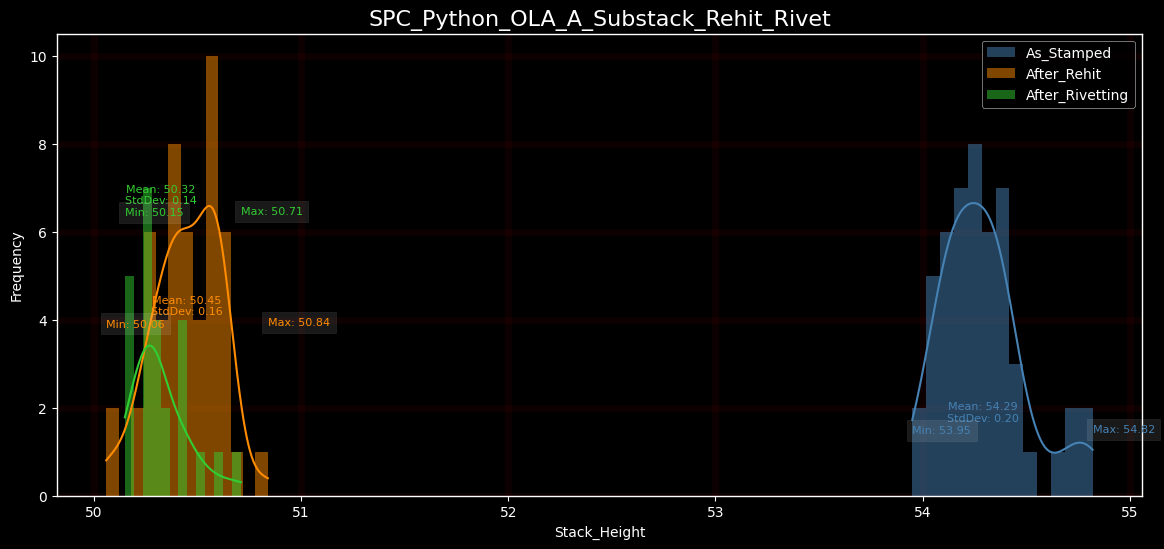

In [24]:
# Filter the DataFrame for A values and relevant process statuses
filtered_df = df[(df['Stack_Type'] == 'A') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]

# Define colors for different process statuses
status_colors = {'As_Stamped': 'steelblue', 'After_Rehit': 'darkorange', 'After_Rivetting': 'limegreen'}

# Set the dark background color for the grid
plt.style.use('dark_background')

# Plot the histogram with different shades of color
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.03  # Adjust this value to control the vertical spacing between callouts

for status, color in status_colors.items():
    subset = filtered_df[filtered_df['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.5, label=status, bins=13, edgecolor='none')

    # Calculate mean and standard deviation for each distribution
    mean = subset['Height'].mean()
    std = subset['Height'].std()

    # Add mean and standard deviation as text annotations inside the graph
    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    # Add maximum and minimum value callouts with highlighted background
    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05  # Increase this value to adjust the spacing between callouts

# Set plot title and labels
plt.title('SPC_Python_OLA_A_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Adjust the grid alpha, color, and linewidth for the horizontal and vertical axes
plt.grid(alpha=0.05, color='red', linewidth=5)

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
 filtered_df[filtered_df['Process_Status'] == status]

,Sno,Stack_Type,Process_Status,N_Min_Max_Type,Measurement_Method,Height
250,251,A,After_Rivetting,Normal,Vernier_Caliper,50.59
251,252,A,After_Rivetting,Normal,Vernier_Caliper,50.41
252,253,A,After_Rivetting,Normal,Vernier_Caliper,50.42
253,254,A,After_Rivetting,Normal,Vernier_Caliper,50.29
254,255,A,After_Rivetting,Normal,Vernier_Caliper,50.32
255,256,A,After_Rivetting,Normal,Vernier_Caliper,50.18
256,257,A,After_Rivetting,Normal,Vernier_Caliper,50.42
257,258,A,After_Rivetting,Normal,Vernier_Caliper,50.34
258,259,A,After_Rivetting,Normal,Vernier_Caliper,50.51
259,260,A,After_Rivetting,Normal,Vernier_Caliper,50.71


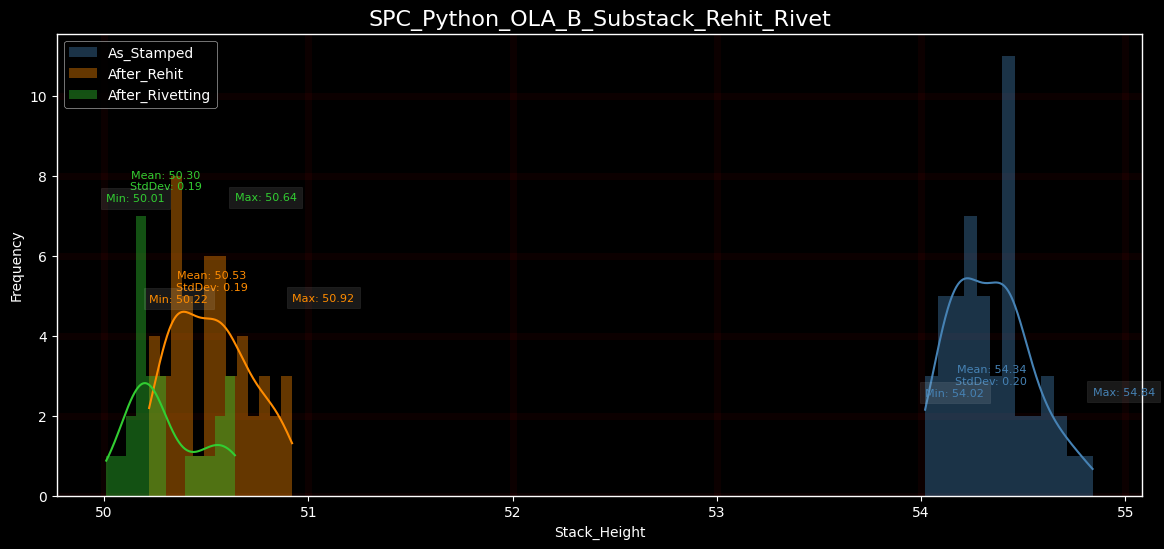

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Filter the DataFrame for B values and relevant process statuses
filtered_df = df[(df['Stack_Type'] == 'B') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]

# Define colors for different process statuses
status_colors = {'As_Stamped': 'steelblue', 'After_Rehit': 'darkorange', 'After_Rivetting': 'limegreen'}

# Set the dark background color for the grid
plt.style.use('dark_background')

# Plot the histogram with different shades of color
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05  # Adjust this value to control the vertical spacing between callouts
for status, color in status_colors.items():
    subset = filtered_df[filtered_df['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.4, label=status, bins=13, edgecolor='none')

    # Calculate mean and standard deviation for each distribution
    mean = subset['Height'].mean()
    std = subset['Height'].std()

    # Add mean and standard deviation as text annotations inside the graph
    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    # Add maximum and minimum value callouts with highlighted background
    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05  # Increase this value to adjust the spacing between callouts

# Set plot title and labels
plt.title('SPC_Python_OLA_B_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Adjust the grid alpha, color, and linewidth for the horizontal and vertical axes
plt.grid(alpha=0.05, color='red', linewidth=5)

# Display the legend
plt.legend()

# Show the plot
plt.show()



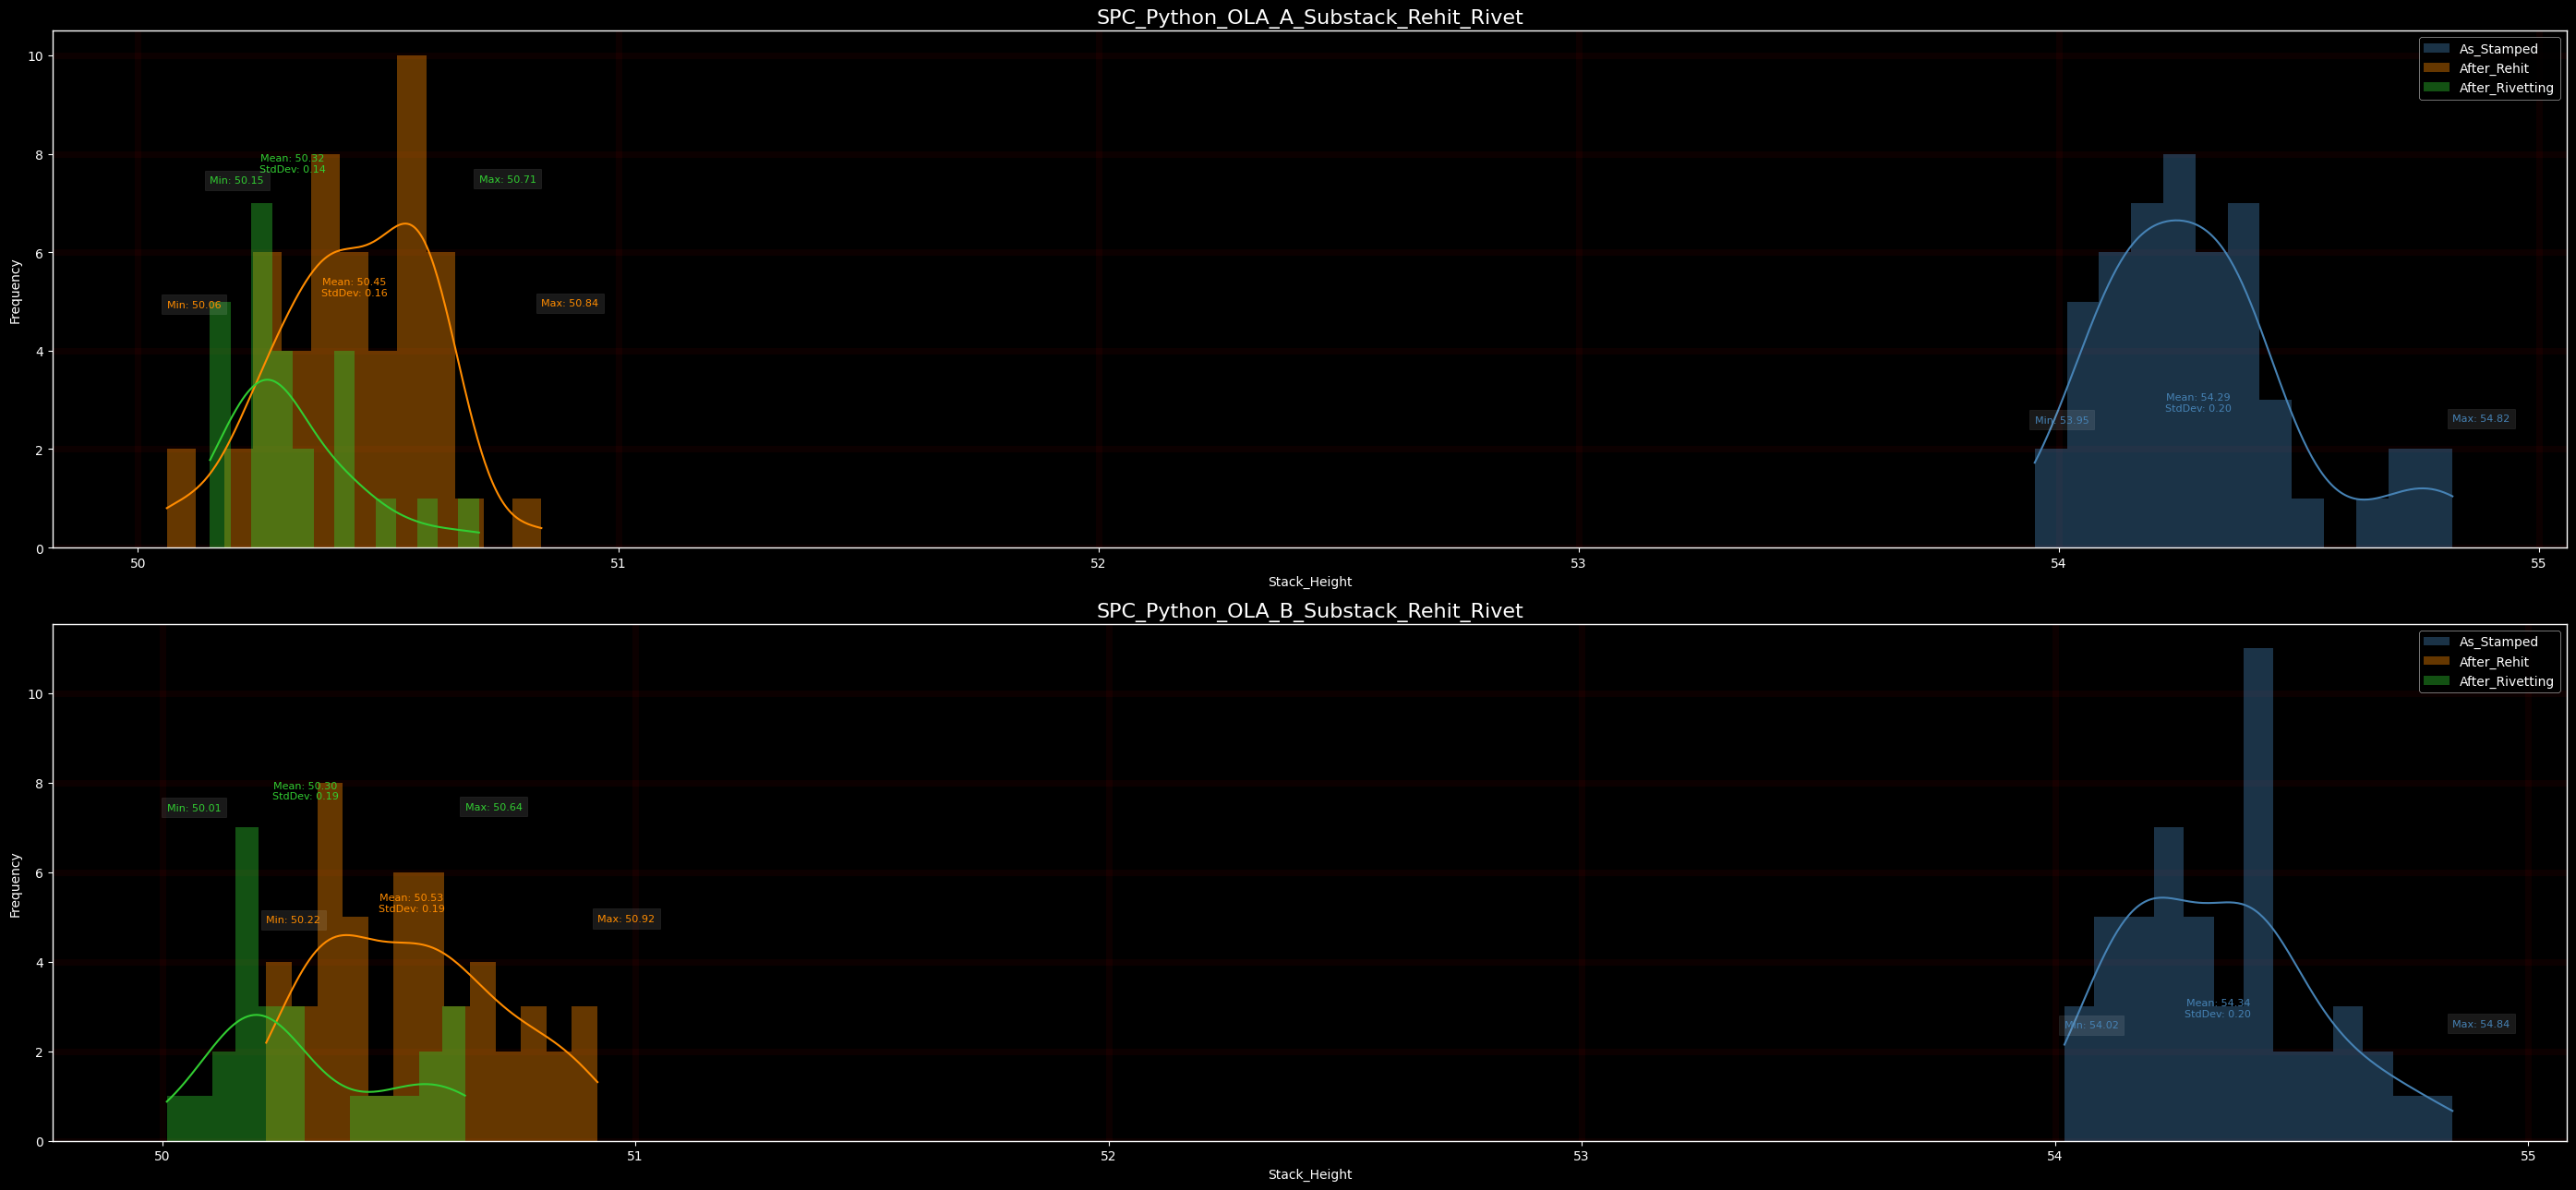

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Filter the DataFrame for A and B values and relevant process statuses
filtered_df_a = df[(df['Stack_Type'] == 'A') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]
filtered_df_b = df[(df['Stack_Type'] == 'B') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]

# Define colors for different process statuses
status_colors = {'As_Stamped': 'steelblue', 'After_Rehit': 'darkorange', 'After_Rivetting': 'limegreen'}

# Set the dark background color for the grid
plt.style.use('dark_background')

# Create subplots with a 2x1 grid
fig, axes = plt.subplots(2, 1, figsize=(28, 13))

# Plot the A histogram in the first subplot
ax1 = axes[0]
callout_x_offset = 0.01
callout_y_offset = 0.05  # Adjust this value to control the vertical spacing between callouts
for status, color in status_colors.items():
    subset = filtered_df_a[filtered_df_a['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.4, label=status, bins=13, edgecolor='none', ax=ax1)

    # Calculate mean and standard deviation for each distribution
    mean = subset['Height'].mean()
    std = subset['Height'].std()

    # Add mean and standard deviation as text annotations inside the graph
    callout_y = subset['Height'].max() * callout_y_offset
    ax1.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    # Add maximum and minimum value callouts with highlighted background
    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    ax1.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    ax1.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05  # Increase this value to adjust the spacing between callouts

# Set plot title and labels for the first subplot
ax1.set_title('SPC_Python_OLA_A_Substack_Rehit_Rivet', fontsize=16)
ax1.set_xlabel('Stack_Height', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.grid(alpha=0.05, color='red', linewidth=5)
ax1.legend()

# Plot the B histogram in the second subplot
ax2 = axes[1]
callout_x_offset = 0.01
callout_y_offset = 0.05  # Adjust this value to control the vertical spacing between callouts
for status, color in status_colors.items():
    subset = filtered_df_b[filtered_df_b['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.4, label=status, bins=13, edgecolor='none', ax=ax2)

    # Calculate mean and standard deviation for each distribution
    mean = subset['Height'].mean()
    std = subset['Height'].std()

    # Add mean and standard deviation as text annotations inside the graph
    callout_y = subset['Height'].max() * callout_y_offset
    ax2.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    # Add maximum and minimum value callouts with highlighted background
    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    ax2.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    ax2.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05  # Increase this value to adjust the spacing between callouts

# Set plot title and labels for the second subplot
ax2.set_title('SPC_Python_OLA_B_Substack_Rehit_Rivet', fontsize=16)
ax2.set_xlabel('Stack_Height', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
ax2.grid(alpha=0.05, color='red', linewidth=5)
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


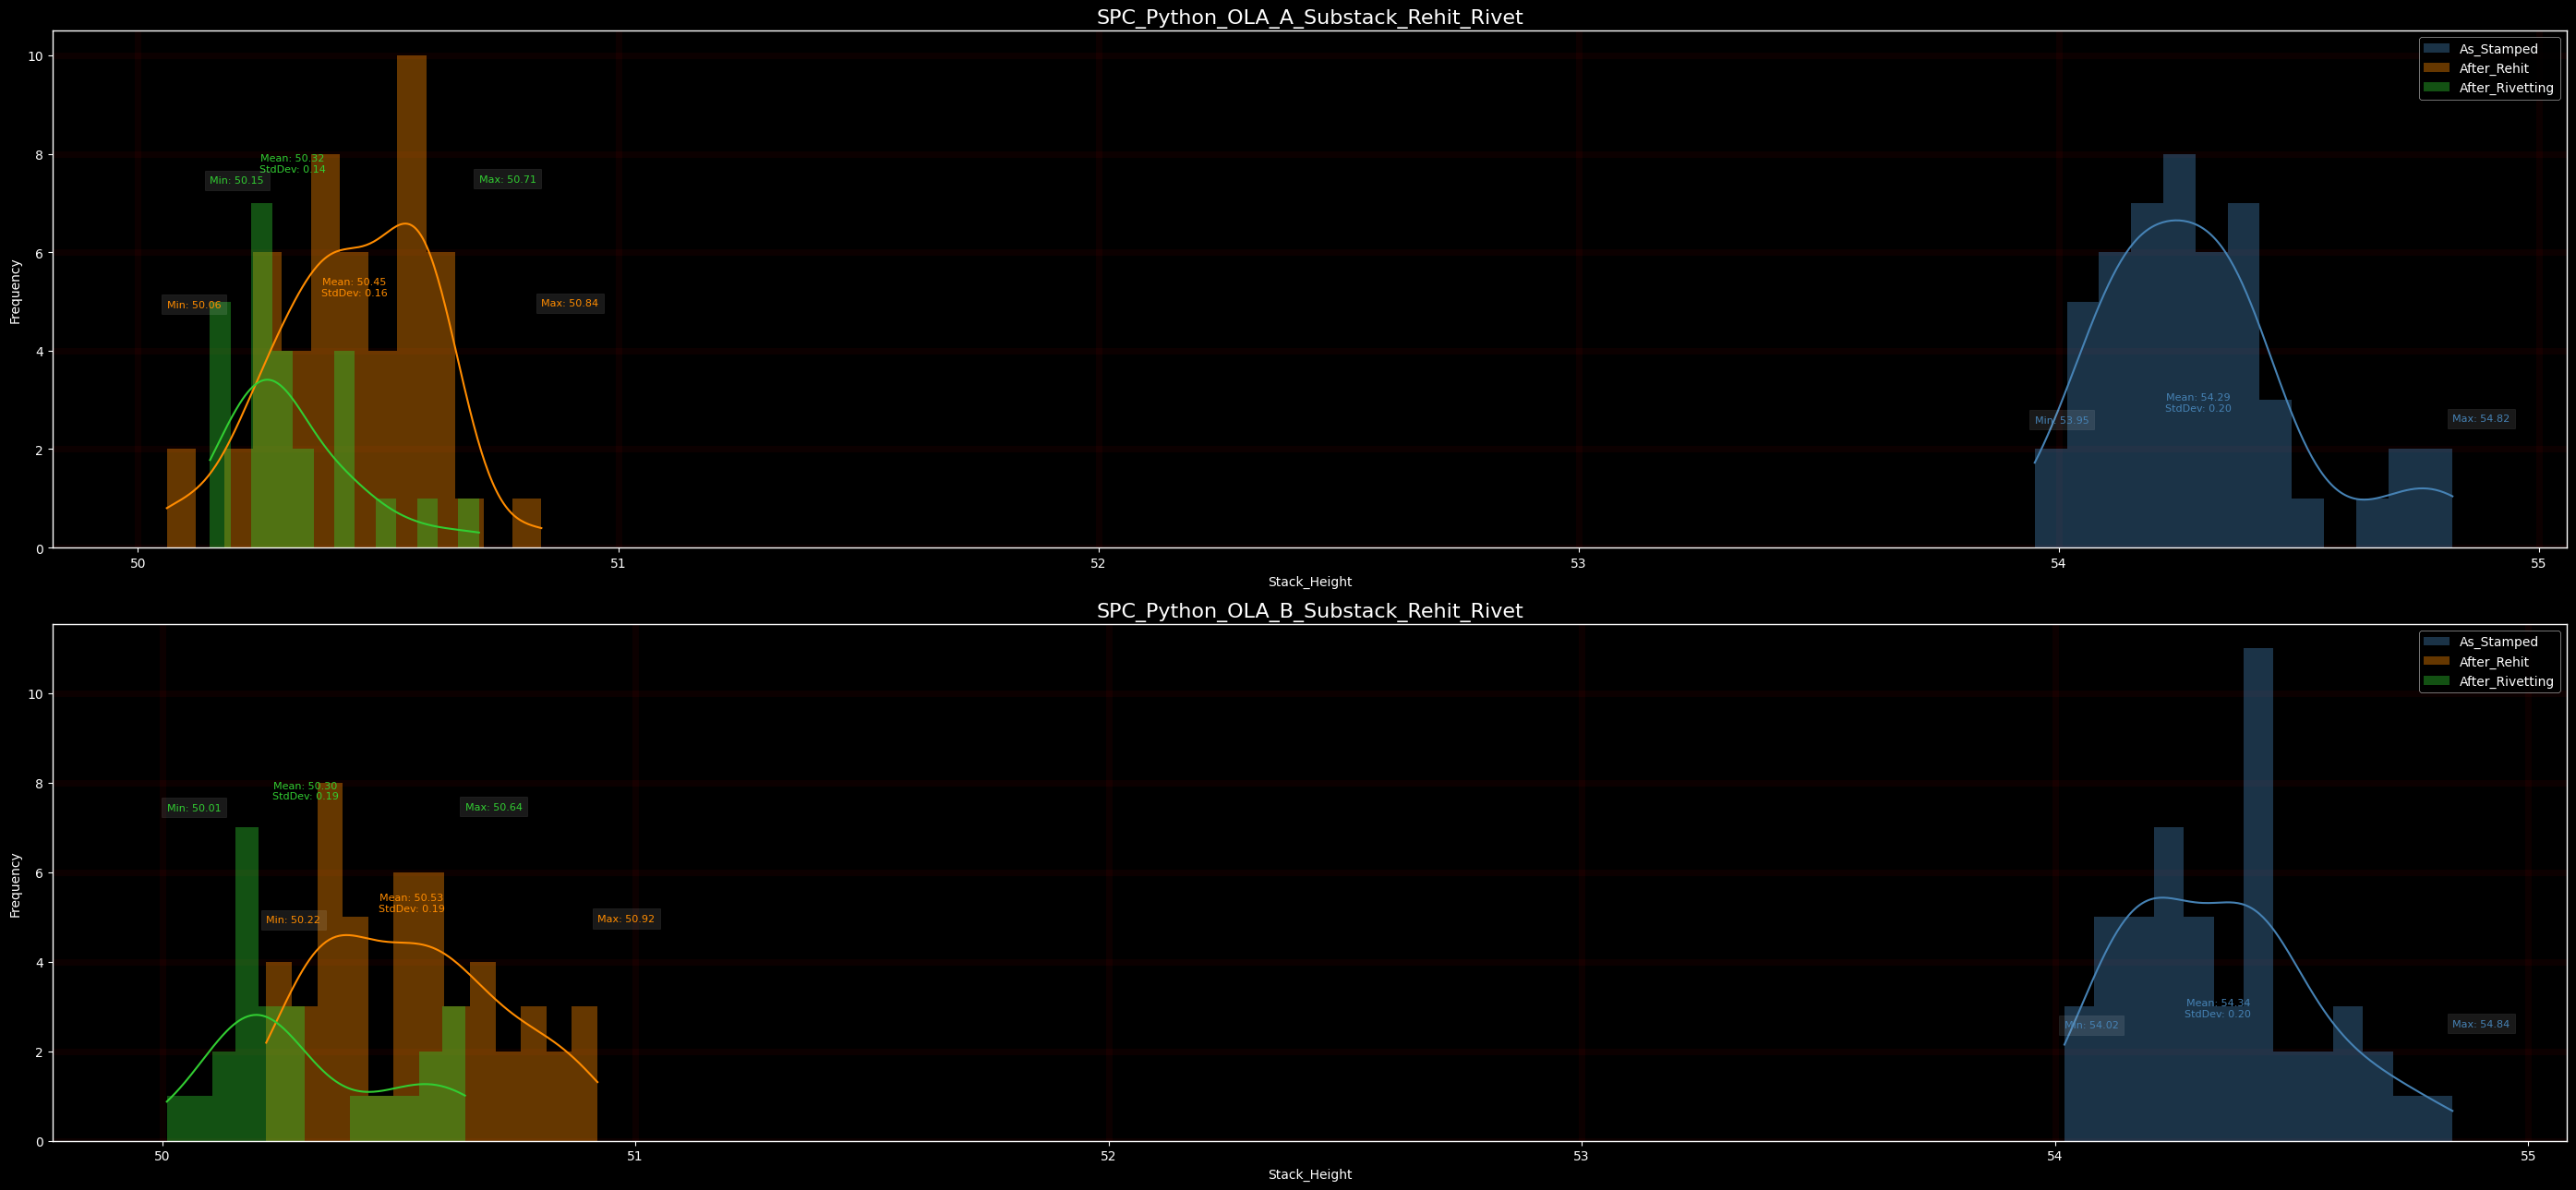

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Filter the DataFrame for A and B values and relevant process statuses
filtered_df_a = df[(df['Stack_Type'] == 'A') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]
filtered_df_b = df[(df['Stack_Type'] == 'B') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]

# Define colors for different process statuses
status_colors = {'As_Stamped': 'steelblue', 'After_Rehit': 'darkorange', 'After_Rivetting': 'limegreen'}

# Set the dark background color for the grid
plt.style.use('dark_background')

# Create subplots with a 2x1 grid
fig, axes = plt.subplots(2, 1, figsize=(28, 13))

# Plot the A histogram in the first subplot
ax1 = axes[0]
callout_x_offset = 0.01
callout_y_offset = 0.05  # Adjust this value to control the vertical spacing between callouts
for status, color in status_colors.items():
    subset = filtered_df_a[filtered_df_a['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.4, label=status, bins=13, edgecolor='none', ax=ax1)

    # Calculate mean and standard deviation for each distribution
    mean = subset['Height'].mean()
    std = subset['Height'].std()

    # Add mean and standard deviation as text annotations inside the graph
    callout_y = subset['Height'].max() * callout_y_offset
    ax1.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    # Add maximum and minimum value callouts with highlighted background
    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    ax1.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    ax1.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05  # Increase this value to adjust the spacing between callouts

# Set plot title and labels for the first subplot
ax1.set_title('SPC_Python_OLA_A_Substack_Rehit_Rivet', fontsize=16)
ax1.set_xlabel('Stack_Height', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.grid(alpha=0.05, color='red', linewidth=5)
ax1.legend()

# Plot the B histogram in the second subplot
ax2 = axes[1]
callout_x_offset = 0.01
callout_y_offset = 0.05  # Adjust this value to control the vertical spacing between callouts
for status, color in status_colors.items():
    subset = filtered_df_b[filtered_df_b['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.4, label=status, bins=13, edgecolor='none', ax=ax2)

    # Calculate mean and standard deviation for each distribution
    mean = subset['Height'].mean()
    std = subset['Height'].std()

    # Add mean and standard deviation as text annotations inside the graph
    callout_y = subset['Height'].max() * callout_y_offset
    ax2.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    # Add maximum and minimum value callouts with highlighted background
    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    ax2.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    ax2.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05  # Increase this value to adjust the spacing between callouts

# Set plot title and labels for the second subplot
ax2.set_title('SPC_Python_OLA_B_Substack_Rehit_Rivet', fontsize=16)
ax2.set_xlabel('Stack_Height', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
ax2.grid(alpha=0.05, color='red', linewidth=5)
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


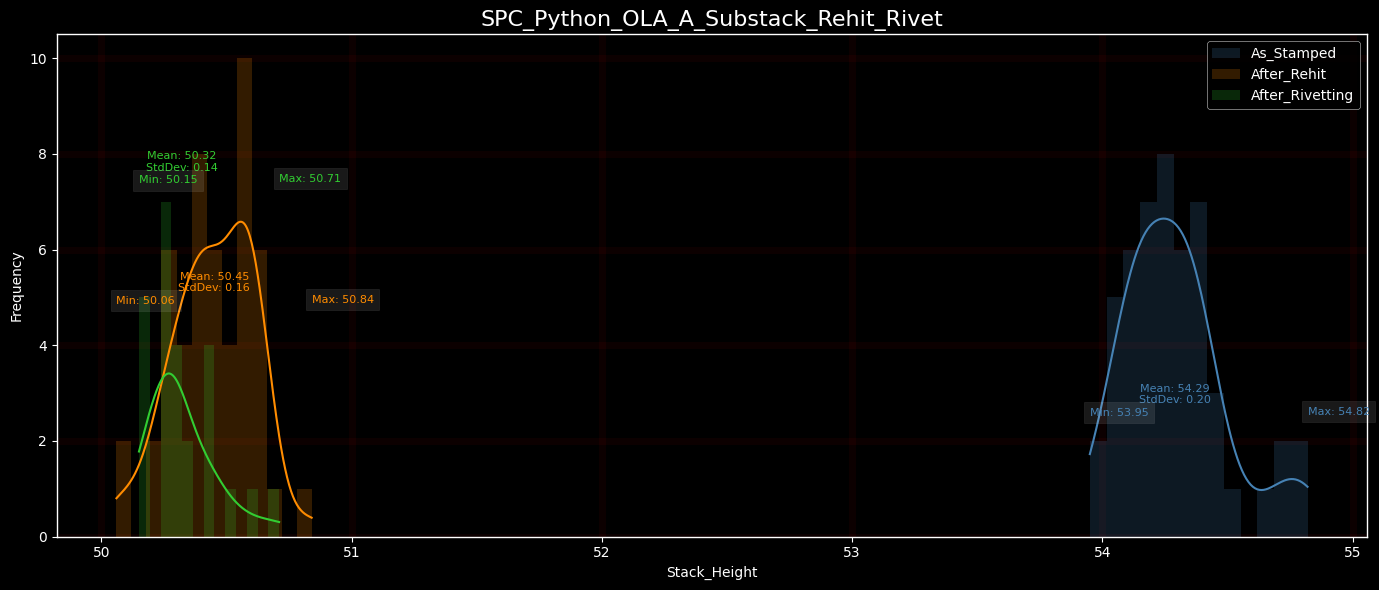

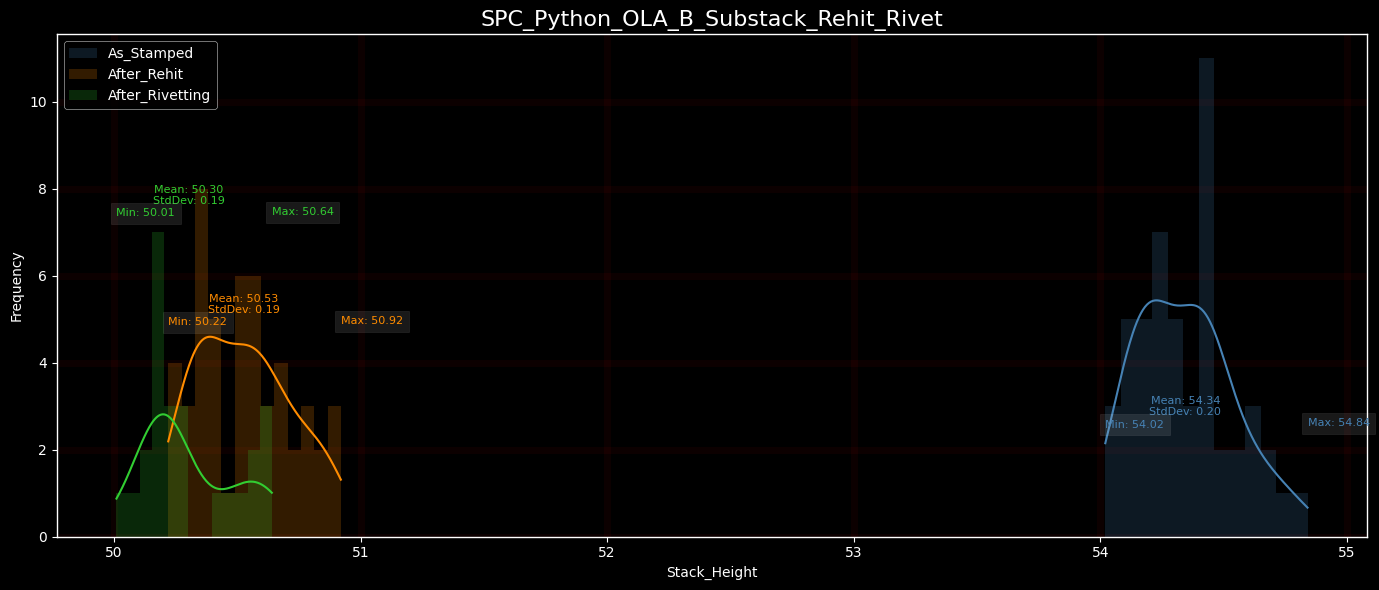

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Filter the DataFrame for A and B values and relevant process statuses
filtered_df_a = df[(df['Stack_Type'] == 'A') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]
filtered_df_b = df[(df['Stack_Type'] == 'B') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]

# Define colors for different process statuses
status_colors = {'As_Stamped': 'steelblue', 'After_Rehit': 'darkorange', 'After_Rivetting': 'limegreen'}

# Set the dark background color for the grid
plt.style.use('dark_background')

# Plot the A histogram
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05
for status, color in status_colors.items():
    subset = filtered_df_a[filtered_df_a['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.2, label=status, bins=13, edgecolor='none')

    mean = subset['Height'].mean()
    std = subset['Height'].std()

    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05

plt.title('SPC_Python_OLA_A_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the B histogram
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05
for status, color in status_colors.items():
    subset = filtered_df_b[filtered_df_b['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.2, label=status, bins=13, edgecolor='none')

    mean = subset['Height'].mean()
    std = subset['Height'].std()

    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05

plt.title('SPC_Python_OLA_B_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Filter the DataFrame for A and B values and relevant process statuses
filtered_df_a = df[(df['Stack_Type'] == 'A') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]
filtered_df_b = df[(df['Stack_Type'] == 'B') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]

# Define colors for different process statuses
status_colors = {'As_Stamped': 'steelblue', 'After_Rehit': 'darkorange', 'After_Rivetting': 'limegreen'}

# Set the dark background color for the grid
plt.style.use('dark_background')

# Plot the A histogram
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05
for status, color in status_colors.items():
    subset = filtered_df_a[filtered_df_a['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.2, label=status, bins=13, edgecolor='none')

    mean = subset['Height'].mean()
    std = subset['Height'].std()

    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05

plt.title('SPC_Python_OLA_A_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/SPC_Python_OLA_A_Substack_Rehit_Rivet.png', dpi=300)
plt.close()

# Plot the B histogram
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05
for status, color in status_colors.items():
    subset = filtered_df_b[filtered_df_b['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.2, label=status, bins=13, edgecolor='none')

    mean = subset['Height'].mean()
    std = subset['Height'].std()

    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05

plt.title('SPC_Python_OLA_B_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/SPC_Python_OLA_B_Substack_Rehit_Rivet.png', dpi=300)
plt.close()

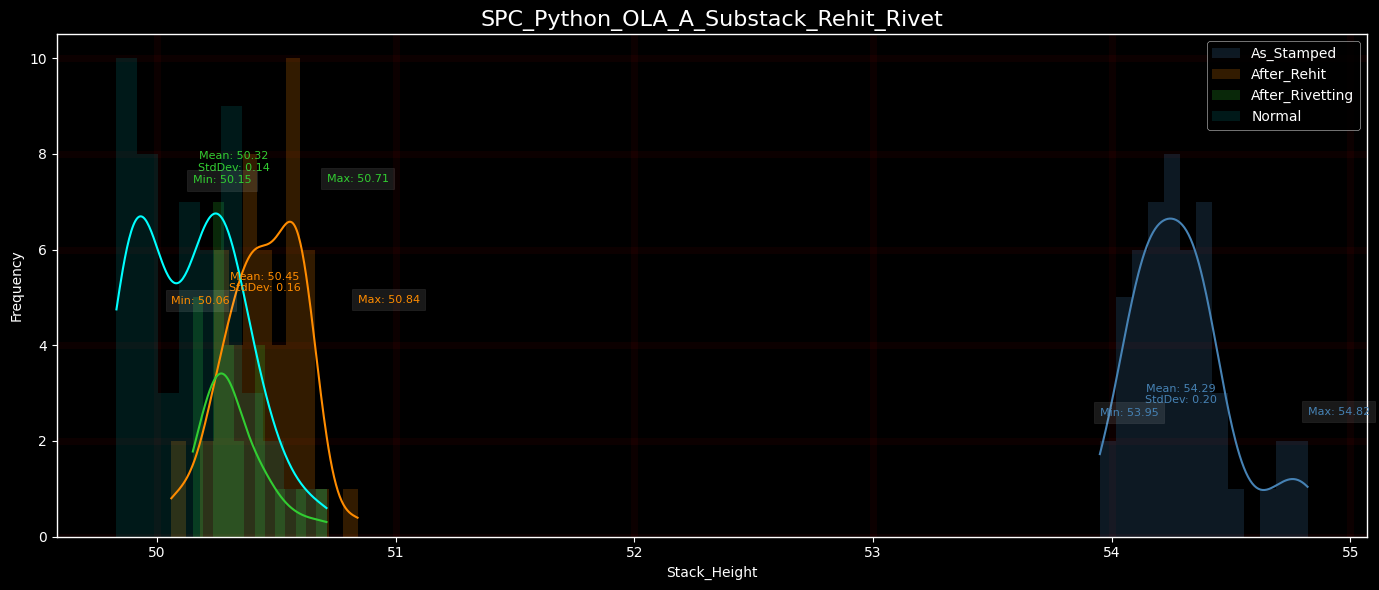

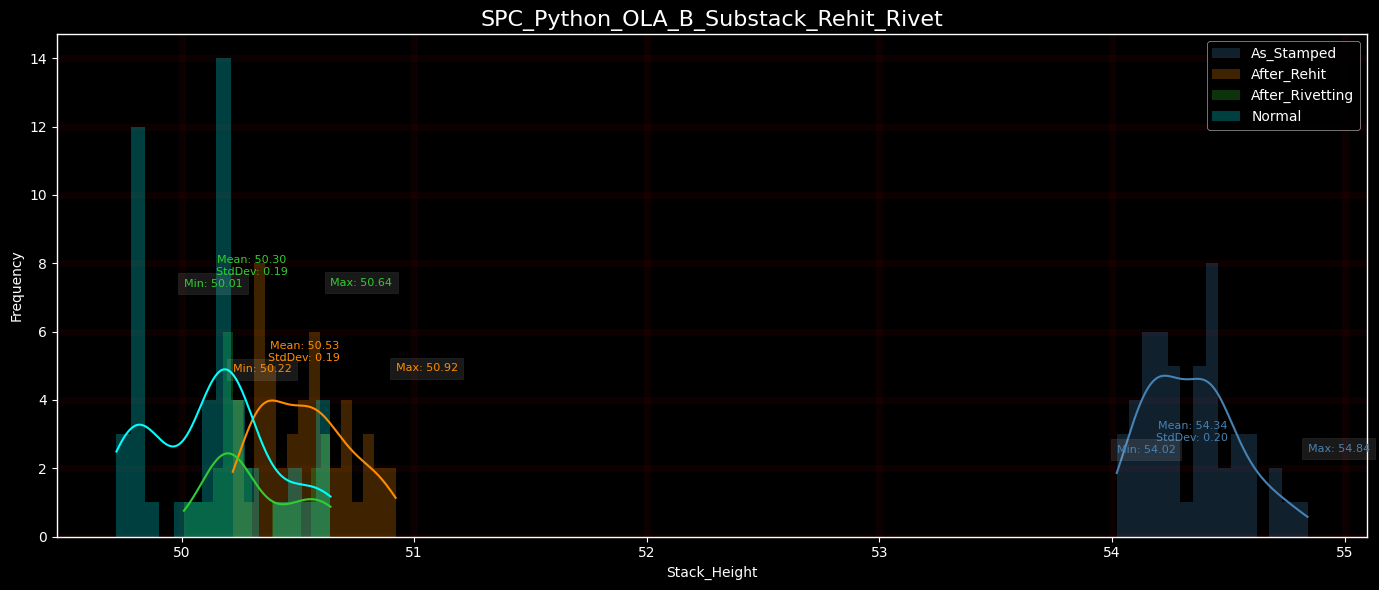

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Filter the DataFrame for A and B values and relevant process statuses
filtered_df_a = df[(df['Stack_Type'] == 'A') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]
filtered_df_b = df[(df['Stack_Type'] == 'B') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]

# Define colors for different process statuses
status_colors = {'As_Stamped': 'steelblue', 'After_Rehit': 'darkorange', 'After_Rivetting': 'limegreen'}

# Set the dark background color for the grid
plt.style.use('dark_background')

# Plot the A histogram
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05
for status, color in status_colors.items():
    subset = filtered_df_a[filtered_df_a['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.2, label=status, bins=13, edgecolor='none')

    mean = subset['Height'].mean()
    std = subset['Height'].std()

    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05

# Plot the additional histogram for 'Normal' data
subset_normal = df[(df['Stack_Type'] == 'A') & (df['N_Min_Max_Type'] == 'Normal')]
sns.histplot(data=subset_normal, x='Height', kde=True, color='cyan', alpha=0.1, label='Normal', bins=10, edgecolor='none')

plt.title('SPC_Python_OLA_A_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/SPC_Python_OLA_A_Substack_Rehit_Rivet.png', dpi=300)
plt.close()

# Plot the B histogram
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05
for status, color in status_colors.items():
    subset = filtered_df_b[filtered_df_b['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.25, label=status, bins=15, edgecolor='none')

    mean = subset['Height'].mean()
    std = subset['Height'].std()

    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05

# Plot the additional histogram for 'Normal' data
subset_normal = df[(df['Stack_Type'] == 'B') & (df['N_Min_Max_Type'] == 'Normal')]
sns.histplot(data=subset_normal, x='Height', kde=True, color='cyan', alpha=0.25, label='Normal', bins=15, edgecolor='none')

plt.title('SPC_Python_OLA_B_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/SPC_Python_OLA_B_Substack_Rehit_Rivet.png', dpi=300)
plt.close()


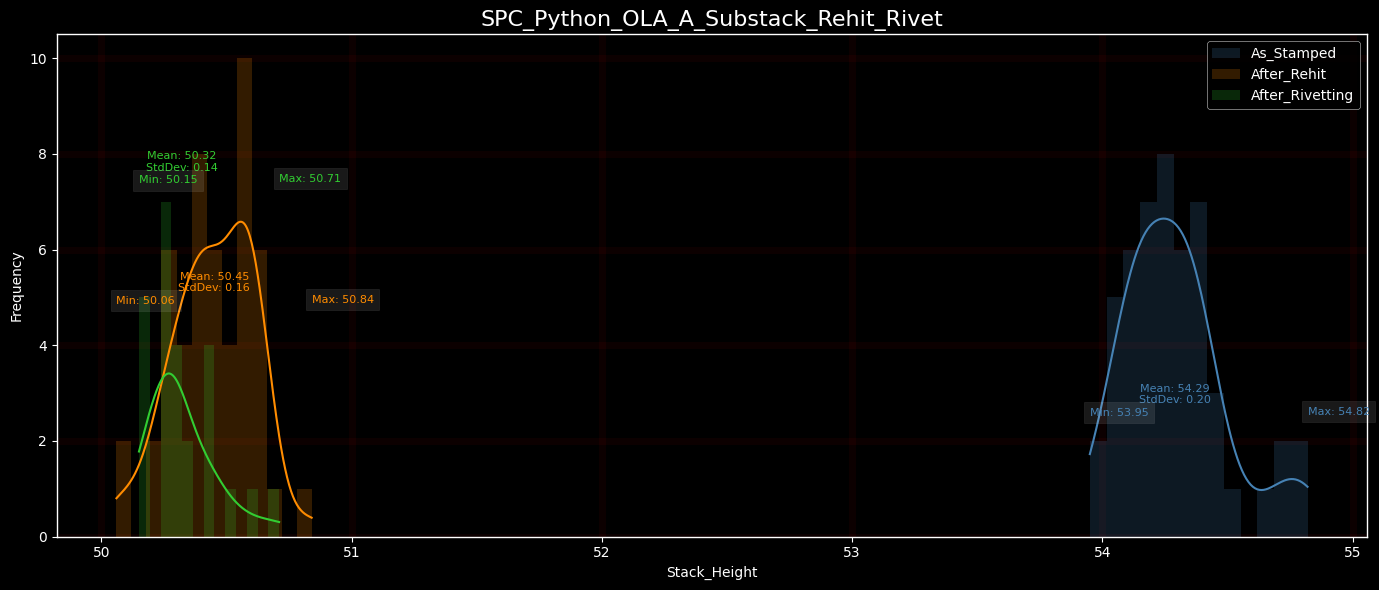

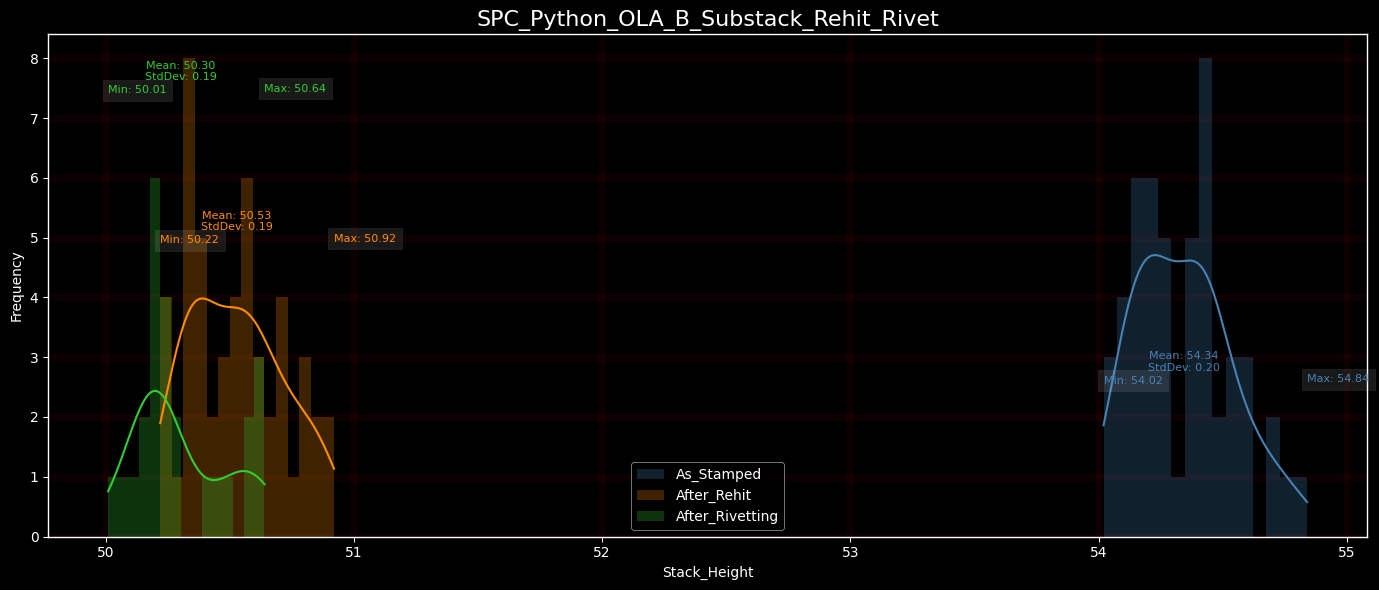

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Filter the DataFrame for A and B values and relevant process statuses
filtered_df_a = df[(df['Stack_Type'] == 'A') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]
filtered_df_b = df[(df['Stack_Type'] == 'B') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]

# Define colors for different process statuses
status_colors = {'As_Stamped': 'steelblue', 'After_Rehit': 'darkorange', 'After_Rivetting': 'limegreen'}

# Set the dark background color for the grid
plt.style.use('dark_background')

# Plot the A histogram
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05
for status, color in status_colors.items():
    subset = filtered_df_a[filtered_df_a['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.2, label=status, bins=13, edgecolor='none')

    mean = subset['Height'].mean()
    std = subset['Height'].std()

    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05

# Plot the additional histogram for 'Digital_5Ton_Reading' data
subset_digital = df[(df['Stack_Type'] == 'A') & (df['N_Min_Max_Type'] == 'Digital_5Ton_Reading')]
sns.histplot(data=subset_digital, x='Height', kde=True, color='cyan', alpha=0.1, label='Digital_5Ton_Reading', bins=10, edgecolor='none')

plt.title('SPC_Python_OLA_A_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/SPC_Python_OLA_A_Substack_Rehit_Rivet.png', dpi=300)
plt.close()

# Plot the B histogram
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05
for status, color in status_colors.items():
    subset = filtered_df_b[filtered_df_b['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.25, label=status, bins=15, edgecolor='none')

    mean = subset['Height'].mean()
    std = subset['Height'].std()

    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'Mean: {mean:.2f}\nStdDev: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05

# Plot the additional histogram for 'Digital_5Ton_Reading' data
subset_digital = df[(df['Stack_Type'] == 'B') & (df['N_Min_Max_Type'] == 'Digital_5Ton_Reading')]
sns.histplot(data=subset_digital, x='Height', kde=True, color='cyan', alpha=0.25, label='Digital_5Ton_Reading', bins=15, edgecolor='none')

plt.title('SPC_Python_OLA_B_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/SPC_Python_OLA_B_Substack_Rehit_Rivet.png', dpi=300)
plt.close()


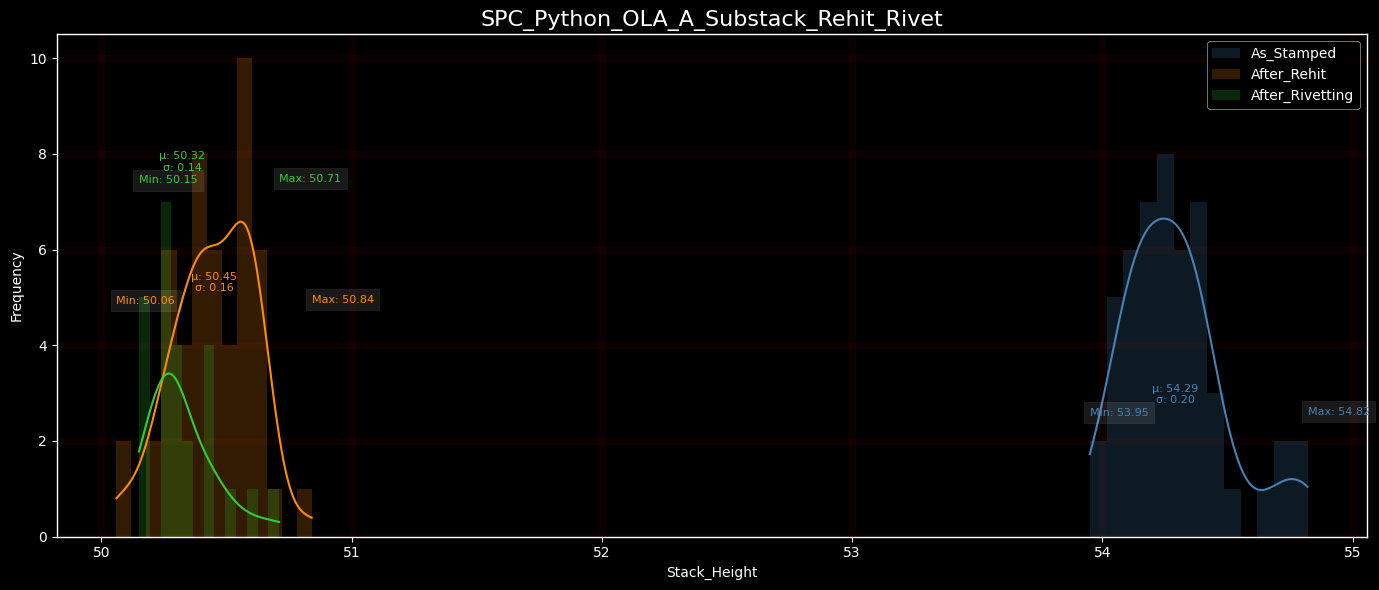

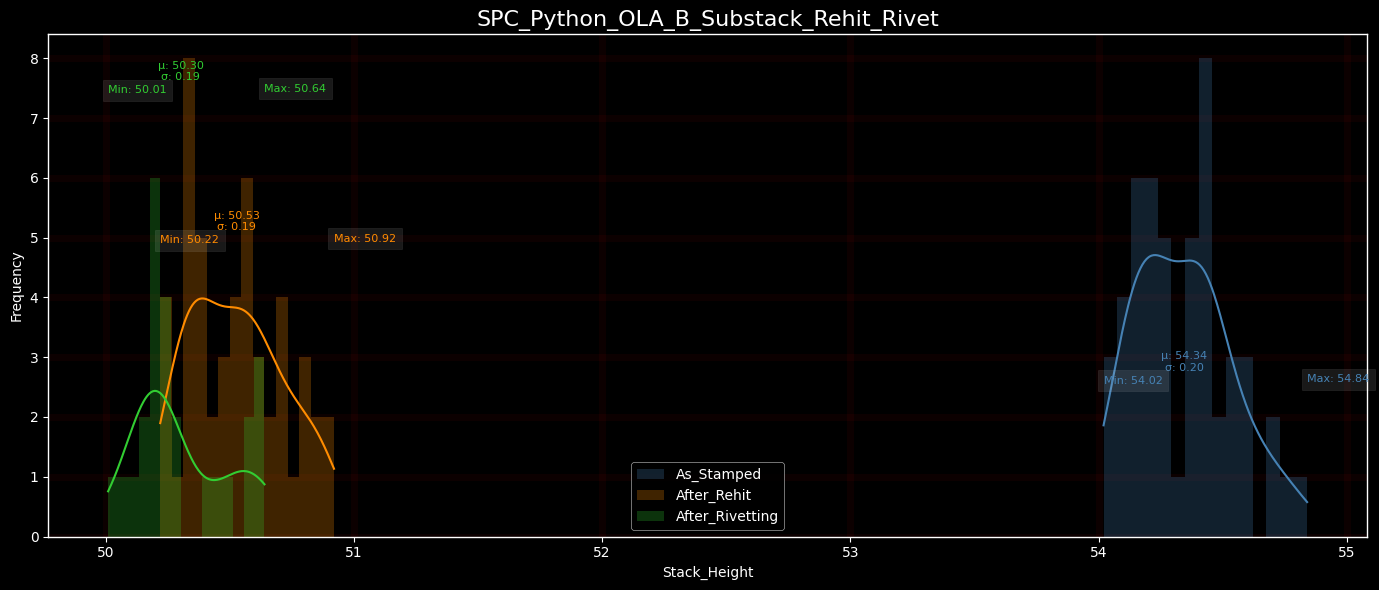

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Filter the DataFrame for A and B values and relevant process statuses
filtered_df_a = df[(df['Stack_Type'] == 'A') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]
filtered_df_b = df[(df['Stack_Type'] == 'B') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]

# Define colors for different process statuses
status_colors = {'As_Stamped': 'steelblue', 'After_Rehit': 'darkorange', 'After_Rivetting': 'limegreen'}

# Set the dark background color for the grid
plt.style.use('dark_background')

# Plot the A histogram
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05
for status, color in status_colors.items():
    subset = filtered_df_a[filtered_df_a['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.2, label=status, bins=13, edgecolor='none')

    mean = subset['Height'].mean()
    std = subset['Height'].std()

    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'μ: {mean:.2f}\nσ: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05

# Plot the additional histogram for 'Digital_5Ton_Reading' data
subset_digital = df[(df['Stack_Type'] == 'A') & (df['N_Min_Max_Type'] == 'Digital_5Ton_Reading')]
sns.histplot(data=subset_digital, x='Height', kde=True, color='cyan', alpha=0.1, label='Digital_5Ton_Reading', bins=10, edgecolor='none')

plt.title('SPC_Python_OLA_A_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/SPC_Python_OLA_A_Substack_Rehit_Rivet.png', dpi=300)
plt.close()

# Plot the B histogram
plt.figure(figsize=(14, 6))
callout_x_offset = 0.01
callout_y_offset = 0.05
for status, color in status_colors.items():
    subset = filtered_df_b[filtered_df_b['Process_Status'] == status]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=0.25, label=status, bins=15, edgecolor='none')

    mean = subset['Height'].mean()
    std = subset['Height'].std()

    callout_y = subset['Height'].max() * callout_y_offset
    plt.text(mean, callout_y, f'μ: {mean:.2f}\nσ: {std:.2f}', ha='center', va='bottom', color=color, fontsize=8)

    max_val = subset['Height'].max()
    min_val = subset['Height'].min()
    highlight_color = 'white'
    highlight_alpha = 0.1
    plt.text(max_val, callout_y - 0.025, f'Max: {max_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))
    plt.text(min_val, callout_y - 0.05, f'Min: {min_val:.2f}', ha='left', va='top', color=color, fontsize=8, bbox=dict(facecolor=highlight_color, alpha=highlight_alpha))

    callout_y_offset += 0.05

# Plot the additional histogram for 'Digital_5Ton_Reading' data
subset_digital = df[(df['Stack_Type'] == 'B') & (df['N_Min_Max_Type'] == 'Digital_5Ton_Reading')]
sns.histplot(data=subset_digital, x='Height', kde=True, color='cyan', alpha=0.25, label='Digital_5Ton_Reading', bins=15, edgecolor='none')

plt.title('SPC_Python_OLA_B_Substack_Rehit_Rivet', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/SPC_Python_OLA_B_Substack_Rehit_Rivet.png', dpi=300)
plt.close()


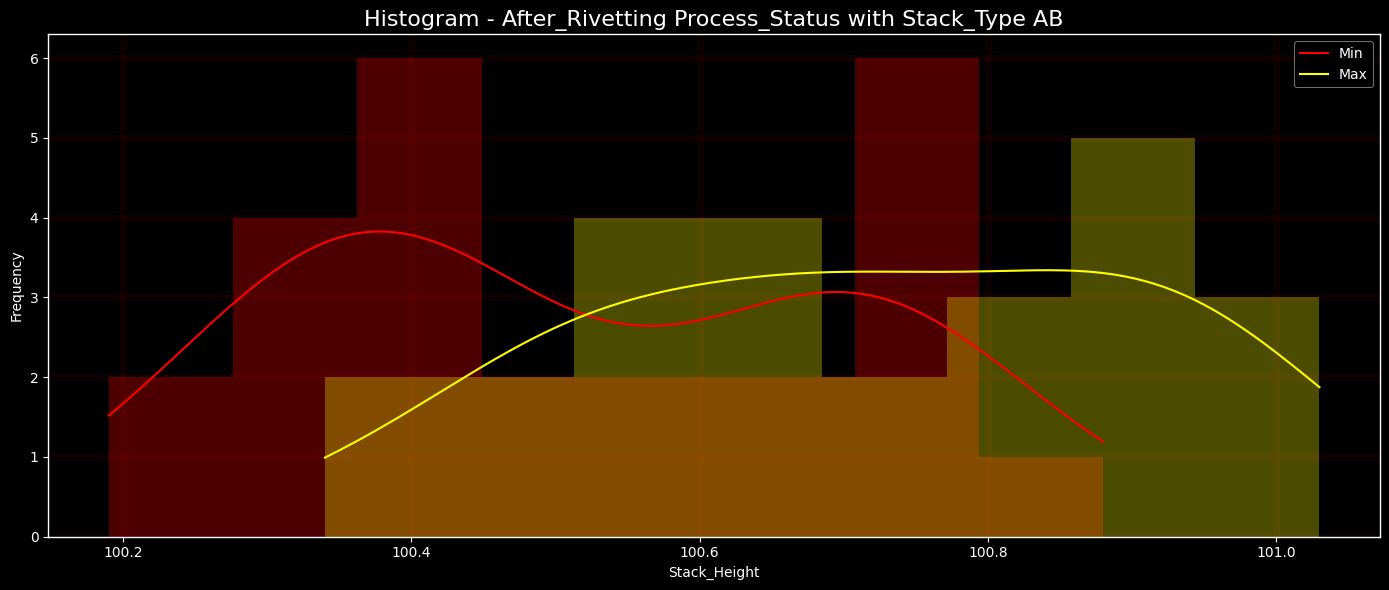

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Filter the DataFrame for AB Stack_Type, After_Rivetting Process_Status, and Min/Max N_Min_Max_Type
filtered_df = df[(df['Stack_Type'] == 'AB') & (df['Process_Status'] == 'After_Rivetting') & (df['N_Min_Max_Type'].isin(['Min', 'Max']))]

# Set the dark background color for the grid
plt.style.use('dark_background')

# Plot the histogram
plt.figure(figsize=(14, 6))
colors = {'Min': 'red', 'Max': 'yellow'}
alpha = 0.3

for n_min_max_type, color in colors.items():
    subset = filtered_df[filtered_df['N_Min_Max_Type'] == n_min_max_type]
    sns.histplot(data=subset, x='Height', kde=True, color=color, alpha=alpha, bins=8, edgecolor='none')

plt.title('Histogram - After_Rivetting Process_Status with Stack_Type AB', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend(colors.keys())
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Calculate the absolute value difference between Before_Rehit for A and B stacks and After_Rehit for stacks A and B
df['Diff_Rehit_Before_Rehit'] = np.abs(df.loc[(df['Stack_Type'].isin(['A', 'B'])) & (df['Process_Status'] == 'Before_Rehit'), 'Height'].values - df.loc[(df['Stack_Type'].isin(['A', 'B'])) & (df['Process_Status'] == 'After_Rehit'), 'Height'].values)
df['Diff_Rehit_Rivet'] = np.abs(df.loc[(df['Stack_Type'].isin(['A', 'B'])) & (df['Process_Status'] == 'Before_Rehit'), 'Height'].values - df.loc[(df['Stack_Type'].isin(['A', 'B'])) & (df['Process_Status'] == 'After_Rivetting'), 'Height'].values)

# Filter the DataFrame for AB Stack_Type, After_Rivetting Process_Status, and Min/Max N_Min_Max_Type
filtered_df_rehit_before_rehit = df[(df['Stack_Type'].isin(['A', 'B'])) & (df['Process_Status'] == 'After_Rehit') & (df['N_Min_Max_Type'].isin(['Min', 'Max']))]
filtered_df_rehit_rivet = df[(df['Stack_Type'].isin(['A', 'B'])) & (df['Process_Status'] == 'After_Rivetting') & (df['N_Min_Max_Type'].isin(['Min', 'Max']))]

# Set the dark background color for the grid
plt.style.use('dark_background')

# Plot the histogram for Diff_Rehit_Before_Rehit
plt.figure(figsize=(20, 10))
colors = {'Min': 'red', 'Max': 'yellow'}
alpha = 0.3

for n_min_max_type, color in colors.items():
    subset = filtered_df_rehit_before_rehit[filtered_df_rehit_before_rehit['N_Min_Max_Type'] == n_min_max_type]
    sns.histplot(data=subset, x='Diff_Rehit_Before_Rehit', kde=True, color=color, alpha=alpha, bins=13, edgecolor='none')

plt.title('Histogram - Diff_Rehit_Before_Rehit', fontsize=16)
plt.xlabel('Absolute Height Difference', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend(colors.keys())
plt.tight_layout()
plt.show()

# Plot the histogram for Diff_Rehit_Rivet
plt.figure(figsize=(20, 10))

for n_min_max_type, color in colors.items():
    subset = filtered_df_rehit_rivet[filtered_df_rehit_rivet['N_Min_Max_Type'] == n_min_max_type]
    sns.histplot(data=subset, x='Diff_Rehit_Rivet', kde=True, color=color, alpha=alpha, bins=13, edgecolor='none')

plt.title('Histogram - Diff_Rehit_Rivet', fontsize=16)
plt.xlabel('Absolute Height Difference', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend(colors.keys())
plt.tight_layout()
plt.show()



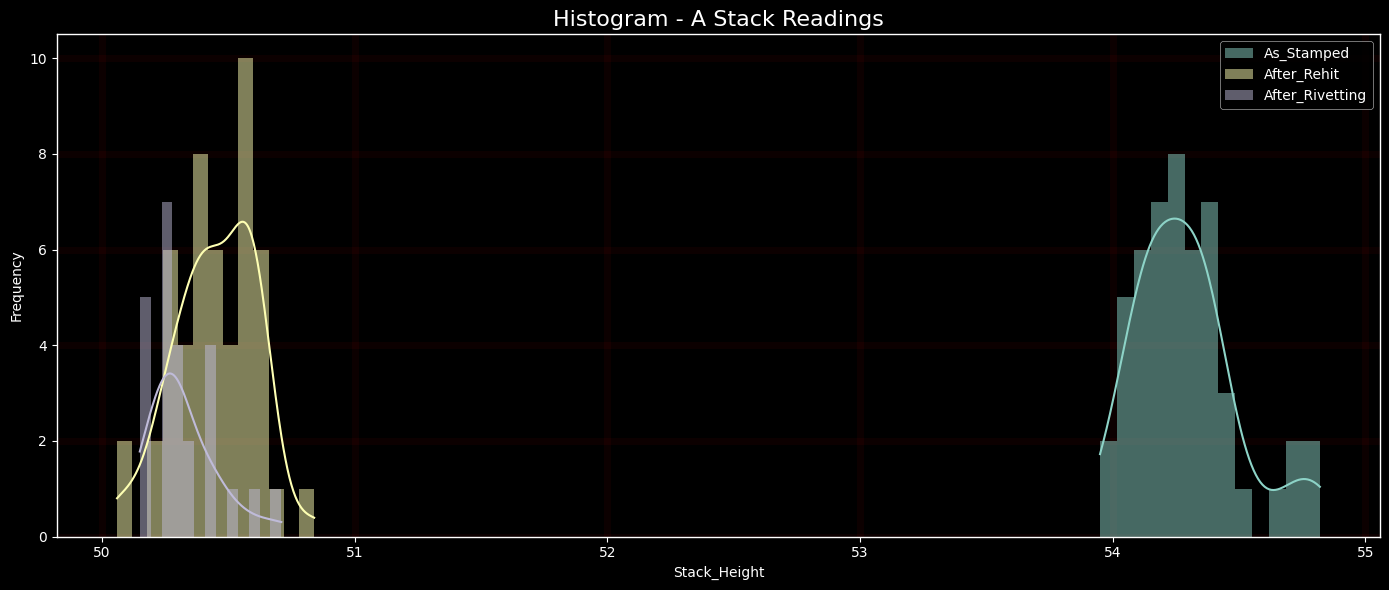

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quality_Management_Systems/OLA_SubstackAnalysis_SameGraph/OLA_Stator_Pivot.csv')

# Filter the DataFrame for A stack readings and relevant process statuses
filtered_df = df[(df['Stack_Type'] == 'A') & (df['Process_Status'].isin(['As_Stamped', 'After_Rehit', 'After_Rivetting']))]

# Set the dark background color for the grid
plt.style.use('dark_background')

# Plot the histogram
plt.figure(figsize=(14, 6))

for process_status in ['As_Stamped', 'After_Rehit', 'After_Rivetting']:
    subset = filtered_df[filtered_df['Process_Status'] == process_status]
    sns.histplot(data=subset, x='Height', kde=True, alpha=0.5, label=process_status, bins=13, edgecolor='none')

plt.title('Histogram - A Stack Readings', fontsize=16)
plt.xlabel('Stack_Height', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(alpha=0.05, color='red', linewidth=5)
plt.legend()
plt.tight_layout()
plt.show()
